<a href="https://colab.research.google.com/github/RicardoACB/AluraStores/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [67]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



El ingreso total para la tienda Tienda 1 es: 1150880400.00
El ingreso total para la tienda Tienda 2 es: 1116343500.00
El ingreso total para la tienda Tienda 3 es: 1098019600.00
El ingreso total para la tienda Tienda 4 es: 1038375700.00


<Axes: xlabel='tienda'>

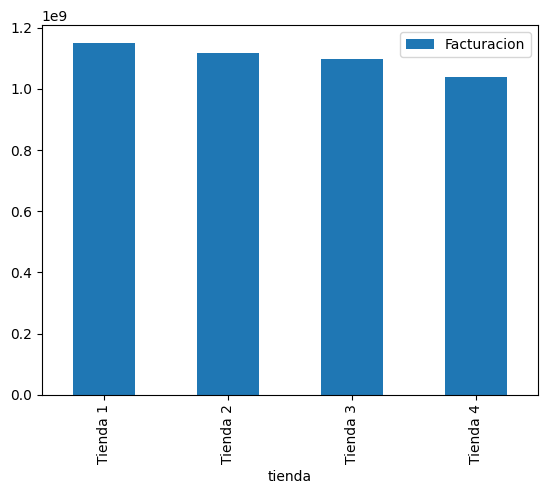

In [68]:
facturacion_tiendas = {
    "tienda":[],
    "Facturacion":[]
    }

tiendas = [tienda,tienda2,tienda3,tienda4]
for indice, _tienda in enumerate(tiendas):
    numero_tienda = "Tienda"+" "+str(indice+1)
    print(f"El ingreso total para la tienda {numero_tienda} es: {(_tienda["Precio"].sum()):.2f}")
    facturacion_tiendas["tienda"].append(numero_tienda)
    facturacion_tiendas["Facturacion"].append(_tienda["Precio"].sum())

facturacion_tiendas = pd.DataFrame(facturacion_tiendas)
facturacion_tiendas.set_index("tienda", inplace=True)
facturacion_tiendas.plot(y=["Facturacion"], kind="bar")




# 2. Ventas por categoría

In [70]:
for indice, _tienda in enumerate(tiendas):
    productoPopular = _tienda["Categoría del Producto"].value_counts()
    print(f"El producto mas popular para la tienda {indice+1} es {productoPopular.index[0]} con {productoPopular.values[0]} ventas")

El producto mas popular para la tienda 1 es Muebles con 465 ventas
El producto mas popular para la tienda 2 es Muebles con 442 ventas
El producto mas popular para la tienda 3 es Muebles con 499 ventas
El producto mas popular para la tienda 4 es Muebles con 480 ventas


In [ ]:

def mostrarGraficoDeVentas():
  while(True):
    conf = 1;
    _tienda = int(input("Dame el numero de la tienda para generar un grafico de pastel sobre la venta de productos segun categoria (1,2,etc): "))
    conteo_tiendas = tiendas[_tienda+1]["Categoría del Producto"].value_counts()
    conteo_tiendas = conteo_tiendas.reset_index()
    conteo_tiendas.columns=["Producto", "Cantidad"]
    plt.pie(conteo_tiendas.Cantidad, labels=conteo_tiendas.Producto, autopct="%0.1f %%")
    plt.show()

    conf = int(input("Desea generar otro grafico?(1 para si, 0 para no): "))

    if conf == 0:
      break



mostrarGraficoDeVentas()


# 3. Calificación promedio de la tienda


In [71]:
for indice, _tiendas in enumerate(tiendas):
  print(f"El promedio de calificacion para la tienda {indice+1} es {_tienda["Calificación"].mean():.0f}")

El promedio de calificacion para la tienda 1 es 4
El promedio de calificacion para la tienda 2 es 4
El promedio de calificacion para la tienda 3 es 4
El promedio de calificacion para la tienda 4 es 4


# 4. Productos más y menos vendidos

In [72]:
Productos_mas_vendidos = {
    "tienda":[],
    "Producto":[],
    "Ventas":[]
    }

tienda["Producto"].value_counts()


for indice, _tienda in enumerate(tiendas):
  td = +"Tienda"+str(indice+1)
  print(f"El producto mas vendido de la tienda {indice+1} es : {_tienda["Producto"].value_counts().index[0]}")

  _tienda.value_counts()

  Productos_mas_vendidos["tienda"].append(td)

El producto mas vendido de la tienda 1 es : Microondas
El producto mas vendido de la tienda 2 es : Iniciando en programación
El producto mas vendido de la tienda 3 es : Kit de bancas
El producto mas vendido de la tienda 4 es : Cama box


# 5. Envío promedio por tienda

In [74]:
for indice, _tienda in enumerate(tiendas):
  print(f"El envio promedio de la tienda {indice+1} es {_tienda['Costo de envío'].mean():.2f}")

El envio promedio de la tienda 1 es 26018.61
El envio promedio de la tienda 2 es 25216.24
El envio promedio de la tienda 3 es 24805.68
El envio promedio de la tienda 4 es 23459.46


# Recomendación: ¿Que tienda se debe vender?

## Propósito del Análisis de Desempeño de Tiendas

El propósito fundamental de este análisis es evaluar y comparar el rendimiento operativo y financiero de las cuatro tiendas (Tienda 1 a Tienda 4) utilizando un conjunto de métricas clave.

El objetivo principal es identificar la tienda con el mejor desempeño comercial global para determinar dónde se deberían concentrar los esfuerzos de inversión, marketing o expansión de inventario (el acto de "vender" en el contexto de una decisión estratégica).

Este informe se centra en las siguientes dimensiones para guiar la toma de decisiones:

    Rentabilidad: Determinada por el Ingreso Total.

    Volumen de Categoría Clave: Medido por las Ventas del Producto Popular (Muebles).

    Experiencia del Cliente: Reflejada en la Calificación Promedio.

    Eficiencia Operativa (Costos): Evaluada a través del Costo de Envío Promedio.

Al consolidar estas métricas, buscamos ofrecer una recomendación clara sobre la priorización de recursos que maximice el retorno de la inversión.

## Análisis por Métrica Clave

Recomendación principal: Tienda 1

La Tienda 1 es la que debería vender con prioridad, ya que es el líder indiscutible en la métrica más importante de rendimiento comercial: el Ingreso Total ($1.150.880.400,00).


    Ingreso Total (Métrica de rendimiento comercial):

        Líder: Tienda 1. Supera a la segunda tienda por más de $34 millones.

    Ventas del Producto Popular 'Muebles' (Métrica de Volumen de Categoría):

        Líder en volumen: Tienda 3 (499 ventas). Esto indica que la Tienda 3 tiene la mayor cantidad de transacciones en la categoría más popular, aunque su menor ingreso total sugiere que el valor promedio de sus ventas puede ser más bajo que el de la Tienda 1 o que tiene un rendimiento menor en otras categorías.

    Calificación Promedio (Métrica de Satisfacción):

        Todas las tiendas tienen una calificación promedio de 4. Esta métrica no es un factor diferenciador.

    Costo Envío Promedio (Métrica de Eficiencia/Costo al Cliente):

        Líder en eficiencia: Tienda 4 ($23,459.46). Esto podría ser una ventaja competitiva en los costos de envío para el cliente, aunque el bajo ingreso total sugiere que esta ventaja no se traduce en mayores ventas.

## Conclusión

A pesar de que la Tienda 3 es la que más vende en volumen dentro de la categoría Muebles y la Tienda 4 tiene el costo de envío más bajo, la Tienda 1 es la mejor opción para priorizar la venta debido a su liderazgo en Ingreso Total. Su rendimiento superior en la métrica financiera global la establece como la tienda con mayor éxito comercial y la que más contribuye a la salud económica general del negocio.